# 1番大きなフラグメントを残して他を除去

rdkit.Chem.MolStandardize.fragment.LargestFragmentChooser()

# 水素の付加

rdkit.Chem.AddHs(mol, addCoords=True)

# 構造最適化

rdkit.AllChem.MMFFOptimizeMolecule(mol)

In [1]:
#rdkitのインストール
!pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのversionを表示
!python -V

Python 3.7.13


In [4]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.3.5'

In [5]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors, Draw
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2022.03.5


# 複数分子の読み込み

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
suppl = Chem.SDMolSupplier('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')

In [8]:
mols = [mol for mol in suppl]

In [9]:
len(suppl)

117

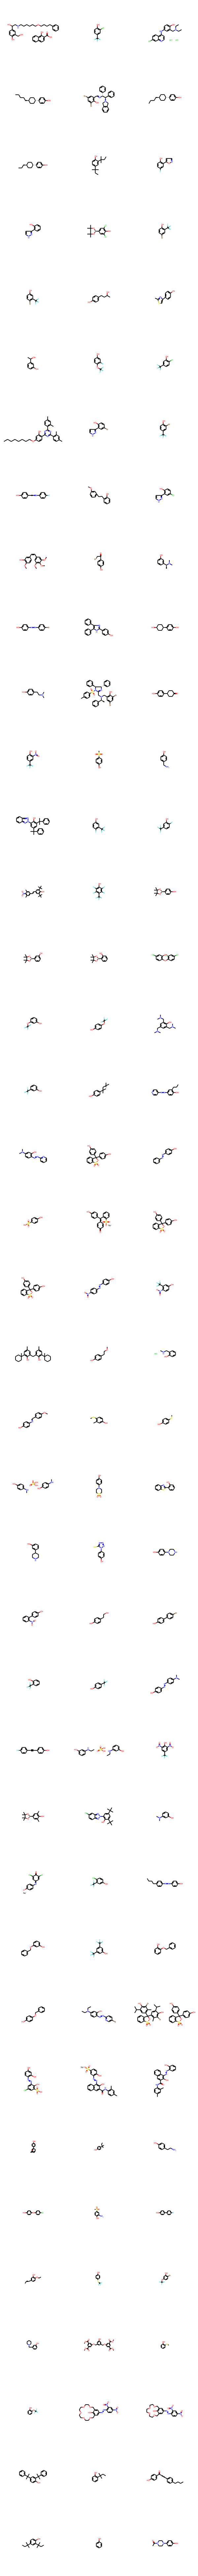

In [10]:
Draw.MolsToGridImage(mols)

# 1番大きなフラグメントを残して他を除去する。

In [11]:
from rdkit.Chem import MolStandardize

lfc = MolStandardize.fragment.LargestFragmentChooser()
# new_mols = [mol for lfc.choose(mol) in mols]
# new_mols

In [12]:
#意味は、for文と同じですがリスト内合表記にしています。新しくリストを作る際には、こちらの書き方の方がすっきり書けるのと実行速度が速いです。
mols2 = [lfc.choose(mol) for mol in mols ]

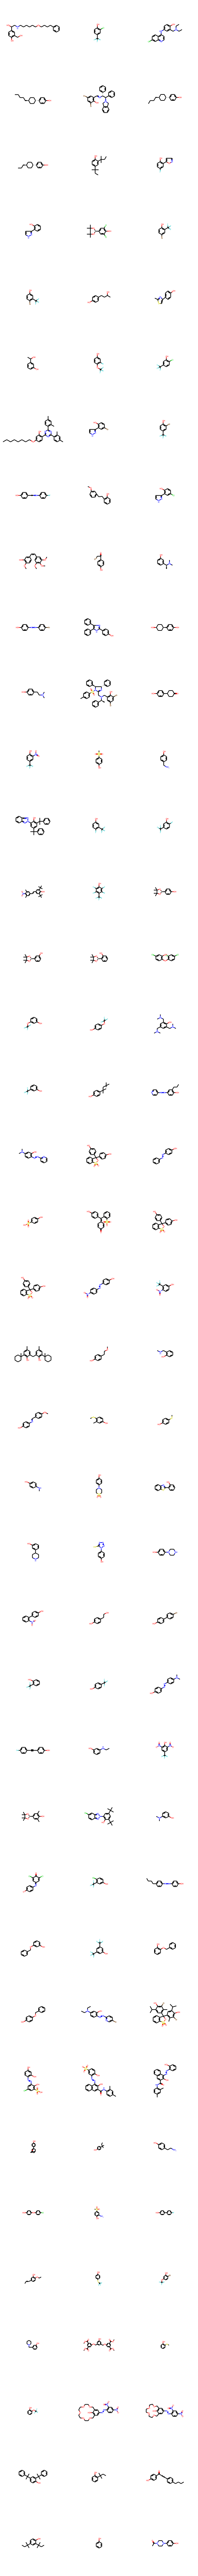

In [13]:
Draw.MolsToGridImage(mols2)

# 水素の付加

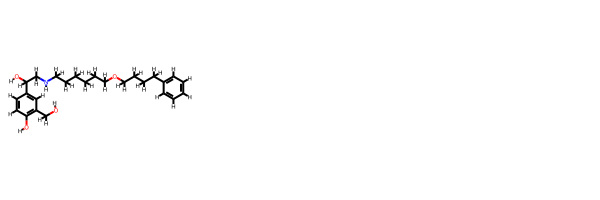

In [14]:
Draw.MolsToGridImage([Chem.AddHs(mols2[0], addCoords=True)])

In [15]:
mols2 = [Chem.AddHs(mol, addCoords=True) for mol in mols2 ]

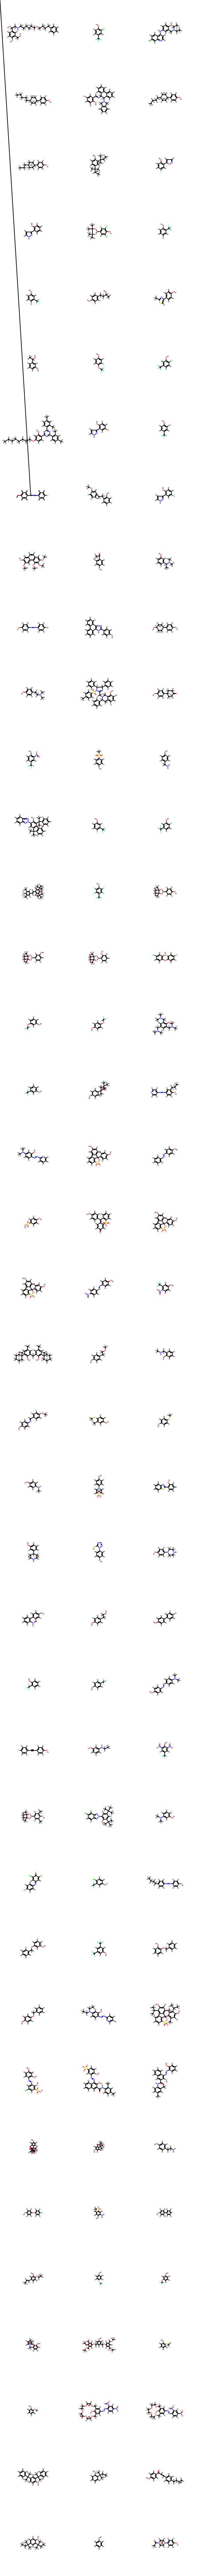

In [16]:
Draw.MolsToGridImage(mols2)

# 構造最適化

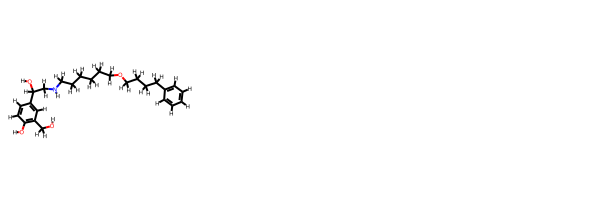

In [17]:
# 配座探索などが必要です。今後の講義で詳しく述べます。ここでは機能紹介だけです。
from rdkit.Chem import AllChem
n = 0
Chem.AddHs(mols2[n], addCoords=True)
AllChem.MMFFOptimizeMolecule(mols2[n])
Draw.MolsToGridImage([mols2[n]])

# 参考資料

RDKitによるコンフォマーの生成<br>
https://future-chem.com/rdkit-conformer/